In [3]:
import scipy.signal 
import matplotlib.pyplot as plt
import numpy as np

[ 0.011109    0.07070077  0.27637807  0.66361036  0.97870739  0.88658978
  0.49331317  0.16859816  0.03539265  0.00456356]


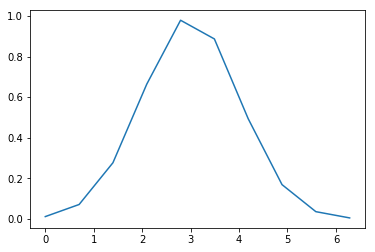

Proceeds to Channel with the following signal:  [ 0.011109    0.07070077  0.27637807  0.66361036  0.97870739  0.88658978
  0.49331317  0.16859816  0.03539265  0.00456356]


In [4]:
#input function
selector = int(input("Enter type of waves: Gaussian (0), Sine(1), Cosine(2), Square(3): "))
t = 2*np.pi
x = np.linspace(0,t,10)
correct = True
while(correct == True):
	if selector == 0:
		a,b,c = input("input parameters for the gaussian curve (scalar, mean, variance): ").split()
		a,b,c = (float(a),float(b), float(c))
		gaussian = a*np.exp(-((x-b)**2)/2*c**2)
		Tx = gaussian
	elif selector==1:
		a,b,c = input("input parameters for the sine curve(amplitude, frequency(Hz), phase): ").split()
		a,b,c = (float(a),float(b), float(c))
		sine = a*np.sin(x*b-c)
		Tx = sine
	elif selector==2:
		a,b,c = input("input parameters for the cosine curve (amplitude, frequency(Hz), phase): ").split() 
		a,b,c = (float(a),float(b), float(c))
		cosine = a*np.cos(x*b-c)
		Tx = cosine
	elif selector==3:
		t = float(input("Time taken for square wave(s): "))
		x = np.linspace(0,t,10)
		square = scipy.signal.square(2*np.pi*x)
		Tx = square
	else:
		Tx = 1

	print (Tx)

	plt.plot(np.linspace(0,t,10),Tx)
	plt.show()
	plt.close()
	check = input("is this the intended input wave? (Yes/No) ")

	if(check == "yes" or check == "Yes"):
		correct = False
	else:
		print("Please re-input the waves parameters.")
		correct = True

print("Proceeds to Channel with the following signal: ", Tx)

In [5]:
#channel characteristics
h,r,d1,d2 = input("Channel Characteristics: Height, Range, d1 and d2 (meters): ").split()
h,r,d1,d2 = [int(h),int(r),int(d1),int(d2)]
f = int(input("Frequency of Transmitter (kHz): "))
eigen = int(input("Number of eigenpath: "))

In [6]:
#concerned variables
distance, lss, la, lb, angle = [0,0,0,0,0]

In [7]:
def findDistance(h,r,d1,d2,s,b):
	global distance
	if s>b or s==b :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	if b>s :
		distance = np.sqrt(r**2+((2*b*h)+d1-((-1)**(s-b))*d2)**2)
	return distance

def findlss(r):
	global lss
	lss =  1.0/r
	return lss

def findAngle(h,r,d1,d2,s,b):
	global angle
	if s>b or s==b:
		angle = 180*np.arctan2(r,((2*b*h)+d1-((-1)**(s-b))*d2))/np.pi
	if b>s:
		angle = 180*np.arctan2(r,((2*b*h)-d1+((-1)**(s-b))*d2))/np.pi
	if s==0 and b==0:
		angle = 0
	return angle

m = (1500.0/1023)
n = (1539.0/1650)

def findlb (angle, m, n,s,b):
	global lb
	lb = np.absolute((m*np.cos(np.pi*angle/180.0)-np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j))/(m*np.cos(np.pi*angle/180.0)+np.sqrt((n**2-(np.sin(np.pi*angle/180.0))**2)+0j)))
	return lb

salinity =  35 #value search on internet based on salinity in singapore
oceanT =  273+26 #26 celsius for shallow water about 70m deep.
ft = 21.9*10**(6-1520/oceanT)

def findla (salinity, ft, f, distance):
	global la
	la = np.exp(-0.998*distance*(((salinity*(2.34*10**-6)*ft*f)/(ft**2+f**2))+(((3.38*10**-6)*f**2)/(ft))))
	return la

tao = 0
def findTao(distance1, distance2):
	global tao
	tao = (distance1 - distance2)/1500 #speed of light
	return tao

#def findDelay(tao,distance, distanceD):
#	findTao(distance, distanceD)
#	d = round(tao*10**9,0)/10**9 #frequency sampling
#	delay.append(d)

In [8]:
def findBj(DirectDelta,s,b,e):
	findDistance(h,r,d1,d2,s,b)
	findAngle(h,r,d1,d2,s,b)
	findTao(distance, distanceD)
	d = round(tao*10**9,0) #frequency sampling
	delay.append(d)
	print ("value of s: ", s, "and value of b:", b)
	print ("Distance for the ", e, "eigen path is: ", round(distance,4))
	findla(salinity, ft, f, distance)
	Bj = lss*la*(findlb(angle,m,n,s,b)**b)*(DirectDelta)
	if s>b:
		Bj = -Bj
	Hn.append(Bj)

	return Hn

In [9]:
#for the first direct Eigenpath
findlss(r)
distanceD = findDistance(h,r,d1,d2,0,0)
print ("lss is: ", round(lss,3))

#Direct Delta function
DirectDelta = 1


lss is:  0.01


value of s:  0 and value of b: 0
Distance for the  1 eigen path is:  100.02
value of s:  1 and value of b: 0
Distance for the  2 eigen path is:  100.7174
value of s:  0 and value of b: 1
Distance for the  3 eigen path is:  234.4014
value of s:  1 and value of b: 1
Distance for the  4 eigen path is:  225.3974
value of s:  2 and value of b: 1
Distance for the  5 eigen path is:  234.4014
value of s:  1 and value of b: 2
Distance for the  6 eigen path is:  423.9623
value of s:  2 and value of b: 2
Distance for the  7 eigen path is:  414.2511
value of s:  3 and value of b: 2
Distance for the  8 eigen path is:  423.9623
value of s:  2 and value of b: 3
Distance for the  9 eigen path is:  620.1161
value of s:  3 and value of b: 3
Distance for the  10 eigen path is:  610.2491
Delay Value:  [0.0, 464952.0, 89587578.0, 83584953.0, 89587578.0, 215961510.0, 209487422.0, 215961510.0, 346730747.0, 340152754.0]
Impulse Response: [0.0099936226542072012, -0.0099935781999546374, 0.0023229861563311819, 0

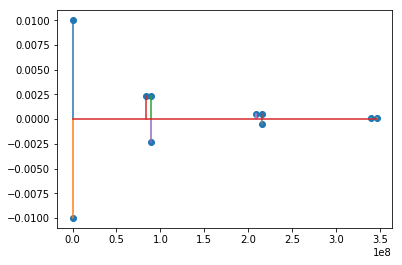

In [10]:
#iterating function (non-recursive)
Hn = []
delay = []
s,b,e = [0,0,0]
for j in range (int(eigen/3)+1):
	for i in range (3):
		if eigen == e:
			break
		e += 1
		findBj(DirectDelta,s,b,e)
		#to change the s and b values
		if i == 0 or i == 2:
			s+= 1
		elif i == 1:
			s-= 1
			b+= 1
            
#plotting the impulse response
print ("Delay Value: ", delay)
print ("Impulse Response:", Hn)
plt.plot()
plt.stem(delay,Hn,'-')
plt.show()

In [11]:
#convolution code
s1 = Tx
s2 = Hn
print ('s1: ', s1)
print ('s2: ', s2)
s3 = np.flip(s2,0)
length = len(s1)+len(s2)-1

s1_zeros = length - len(s1)
s3_zeros = length - len(s3)

temp_s1 = np.concatenate((np.zeros(s1_zeros),s1))
temp_s2 = np.concatenate((s3, np.zeros(s3_zeros)))
print('temp_s1 (pure input): ', temp_s1)
print('temp_s2 (pure input): ', temp_s2)

mul = 0
out = np.zeros(length)

for i in range(length):
	if(i==0):
		mul = temp_s1*temp_s2
		print('temp_s2 (when i==0): ', temp_s2)
		print('temp_s1 (when i==0): ', temp_s1)
		out[i] = sum(mul)
	else:
		temp_s1 = np.concatenate((temp_s1[1:],temp_s1[:1]))#left shift, not sure how to do right shift
		print('temp_s2: ', temp_s2)
		print('temp_s1: ', temp_s1)
		mul = temp_s1*temp_s2
		out[i] = sum(mul)

s1:  [ 0.011109    0.07070077  0.27637807  0.66361036  0.97870739  0.88658978
  0.49331317  0.16859816  0.03539265  0.00456356]
s2:  [0.0099936226542072012, -0.0099935781999546374, 0.0023229861563311819, 0.0023092054171581595, -0.0023008108810308159, 0.00050386821992345237, 0.00050316957618225721, -0.00050266256320309578, 0.00011110320408472027, 0.00011103949876093647]
temp_s1 (pure input):  [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.011109    0.07070077  0.27637807  0.66361036
  0.97870739  0.88658978  0.49331317  0.16859816  0.03539265  0.00456356]
temp_s2 (pure input):  [ 0.00011104  0.0001111  -0.00050266  0.00050317  0.00050387 -0.00230081
  0.00230921  0.00232299 -0.00999358  0.00999362  0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
temp_s2 (when i==0):  [ 0.00011104  0.0001111  -0.00050266  0.00050317  0.00050387 -0.00230081
  0.00230921  0.00232299 -0.00999358  0

Delay Value:  [0.0, 464952.0, 89587578.0, 83584953.0, 89587578.0, 215961510.0, 209487422.0, 215961510.0, 346730747.0, 340152754.0]
Impulse Response: [0.0099936226542072012, -0.0099935781999546374, 0.0023229861563311819, 0.0023092054171581595, -0.0023008108810308159, 0.00050386821992345237, 0.00050316957618225721, -0.00050266256320309578, 0.00011110320408472027, 0.00011103949876093647]
Final signal:  [  1.11019119e-04   5.95538178e-04   2.08127051e-03   4.05975551e-03
   3.92871572e-03   1.10215461e-03  -7.18962369e-04  -2.83078528e-04
   4.93916744e-05  -1.19943730e-04  -6.49169626e-05   1.15458817e-05
  -9.53175247e-07   5.13748974e-05   8.86151113e-05   5.80147253e-05
   2.03593629e-05   4.43700807e-06   5.06735100e-07]


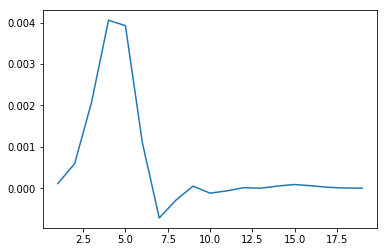

In [12]:
#plotting the final Receiving Signal
print ("Delay Value: ", delay)
print ("Impulse Response:", Hn)
print ("Final signal: ", out)
x_axis = np.linspace(1,len(out),len(out))
plt.plot(x_axis,out)
plt.show()